In [5]:
!pip install geopy

  Using cached geopy-1.22.0-py2.py3-none-any.whl (113 kB)
  Using cached geographiclib-1.50-py3-none-any.whl (38 kB)


In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
from voronoid import *
from drawvoronoid import *
import matplotlib.path as path
import matplotlib as mpl
import smopy
import pandas as pd
%matplotlib inline
import smopy
from scipy.spatial import Voronoi 
import random
import geopandas
import geopy
from geopy.geocoders import Nominatim

Lowered zoom level to keep map size reasonable. (z = 8)


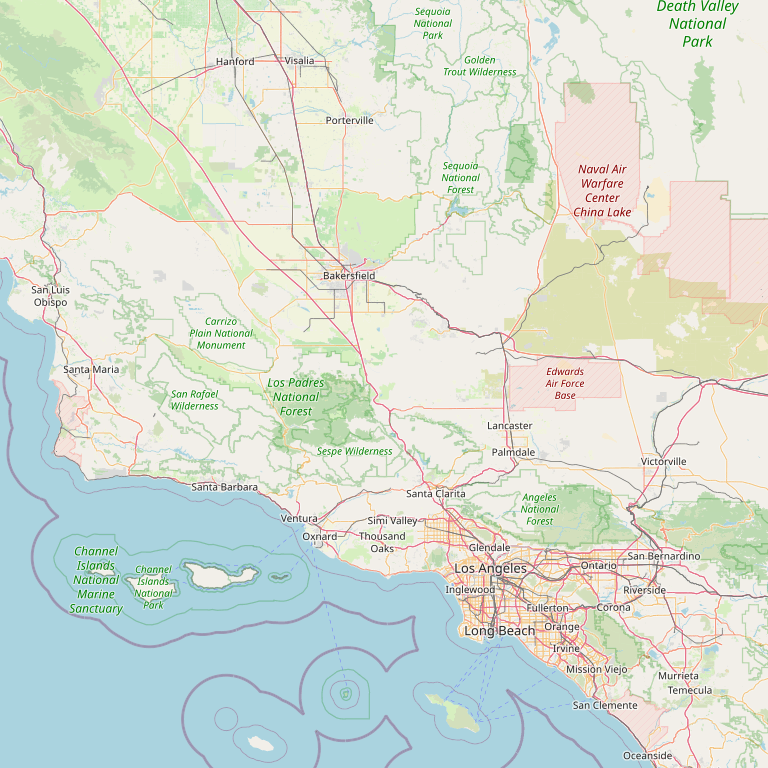

TypeError: unsupported operand type(s) for -: 'str' and 'int'

In [3]:
hospitals = pd.read_csv('Hospitals.csv')[:10]
hospitals

address = hospitals.ADDRESS 
city = hospitals.CITY
state = hospitals.STATE 
zips = hospitals.ZIP.astype('str')


mapped = zip(address, city, state, zips)
mapped = list(mapped)
mapped

locations = [','.join(loc) for loc in mapped]
hospitals['address'] = locations

hospitals

locator = Nominatim(user_agent="myGeocoder")
addresses = [locator.geocode(location) for location in locations if locator.geocode(location)!= None]

latitudes = np.array([address.latitude for address in addresses])
longtitudes = np.array([address.longitude for address in addresses])

box=(min(latitudes), min(longtitudes),
 max(latitudes), max(longtitudes))

m = smopy.Map(box, z=12)

m.show_ipython()

regions, finalpoints, xmin, xmax, ymin, ymax = findRegion(locations)

cells = [m.to_pixels(region)
         for region in regions]

cmap = plt.cm.Set3
# We generate colors for districts using a color map.
colors_districts = cmap(
    np.linspace(0., 1., len(locations)))[:, :3]
# The color of every polygon, grey by default.
colors = .25 * np.ones((len(locations), 3))



fig = plt.figure()





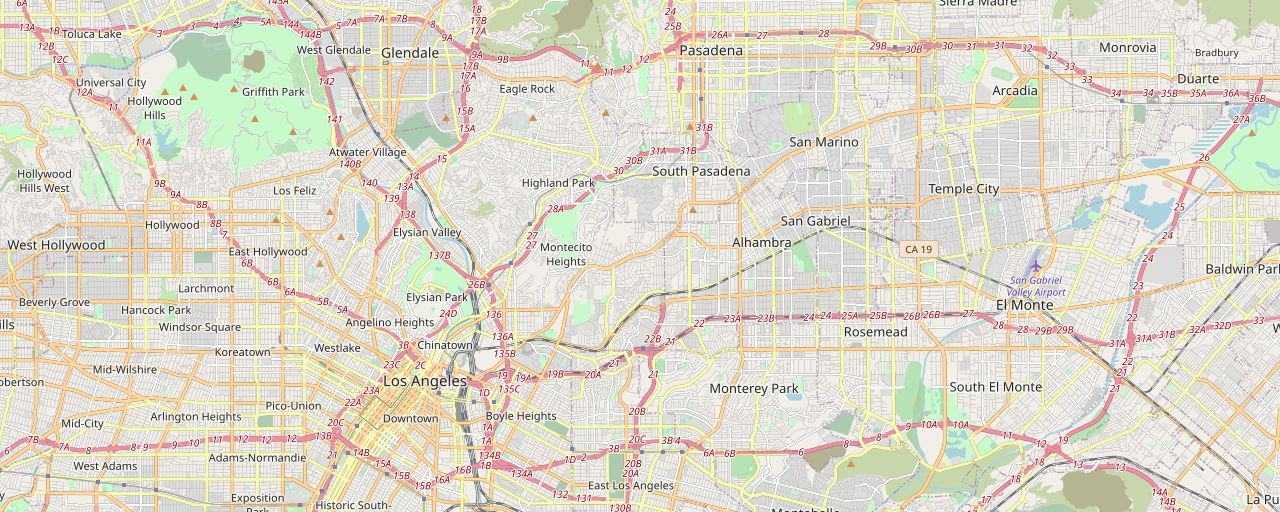

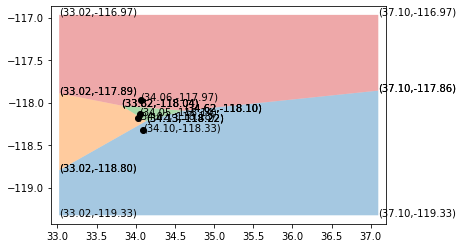

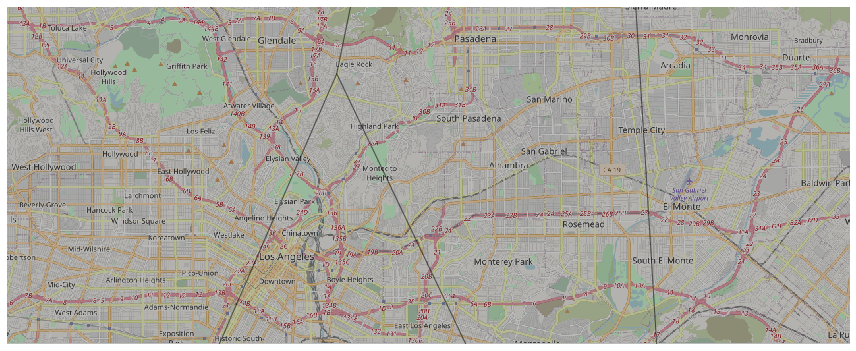

In [4]:
locations = [(34.09665955, -118.32532039012489),
 (34.023160250000004, -118.1843731349353),
 (34.04980485, -118.13808529561979),
 (34.06255465, -117.96774447903846)]

latitudes, longtitudes = zip(*locations)

box=(min(latitudes), min(longtitudes),
 max(latitudes), max(longtitudes))

m = smopy.Map(box, z=12)

m.show_ipython()

regions, finalpoints, xmin, xmax, ymin, ymax = findRegion(locations)

cells = [m.to_pixels(region)
         for region in regions]

cmap = plt.cm.Set3
# We generate colors for districts using a color map.
colors_districts = cmap(
    np.linspace(0., 1., len(locations)))[:, :3]
# The color of every polygon, grey by default.
colors = .25 * np.ones((len(locations), 3))



fig = plt.figure()

plotVoronoi(locations)
ax = m.show_mpl(figsize=(12, 8))
ax.add_collection(
    mpl.collections.PolyCollection(
        cells, facecolors=colors,
        edgecolors='k', alpha=.35))